Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

In [1]:
import os

file_name = "transactions.csv"

# Check if the file exists in the current directory
if os.path.exists(file_name):
    print(f"The file '{file_name}' exists in the current directory.")
else:
    print(f"The file '{file_name}' does not exist in the current directory.")


The file 'transactions.csv' exists in the current directory.


In [3]:
# Print the column names to identify the correct column name to use
print(df.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Read the dataset (transactions.csv) as a Pandas dataframe
df = pd.read_csv("transactions.csv")

# Step 2: Return the column names as a list from the dataframe
column_names = df.columns.tolist()

# Step 3: Return the first k rows from the dataframe
k = 5  # Change k to any desired number
first_k_rows = df.head(k)

# Step 4: Return a random sample of k rows from the dataframe
random_k_rows = df.sample(k)

# Step 5: Return a list of the unique transaction types
unique_transaction_types = df['type'].unique().tolist()

# Step 6: Return a Pandas series of the top 10 transaction destinations with frequencies
top_10_destinations = df['nameDest'].value_counts().head(10)

# Step 7: Return all the rows from the dataframe for which fraud was detected
fraud_detected_rows = df[df['isFraud'] == 1]

# Bonus: Return a dataframe with the number of distinct destinations each source has interacted with
distinct_destinations_count = df.groupby('nameOrig')['nameDest'].nunique().reset_index()
distinct_destinations_count_sorted = distinct_destinations_count.sort_values(by='nameDest', ascending=False)

# Print the results for each step
print("Column Names:", column_names)
print("\nFirst", k, "Rows:")
print(first_k_rows)
print("\nRandom", k, "Rows:")
print(random_k_rows)
print("\nUnique Transaction Types:", unique_transaction_types)
print("\nTop 10 Transaction Destinations with Frequencies:")
print(top_10_destinations)
print("\nRows with Fraud Detected:")
print(fraud_detected_rows)
print("\nDistinct Destinations Count for Each Source (Sorted in Descending Order):")
print(distinct_destinations_count_sorted)


Column Names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

First 5 Rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  

Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

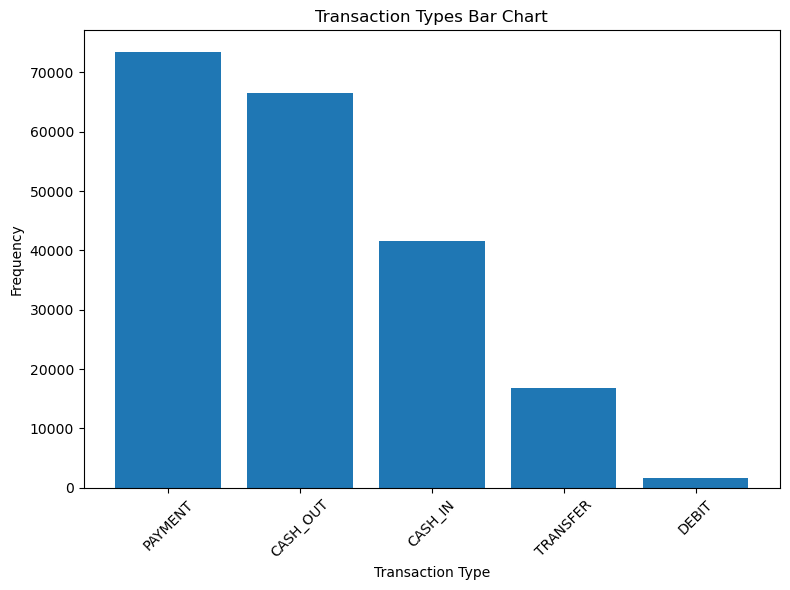

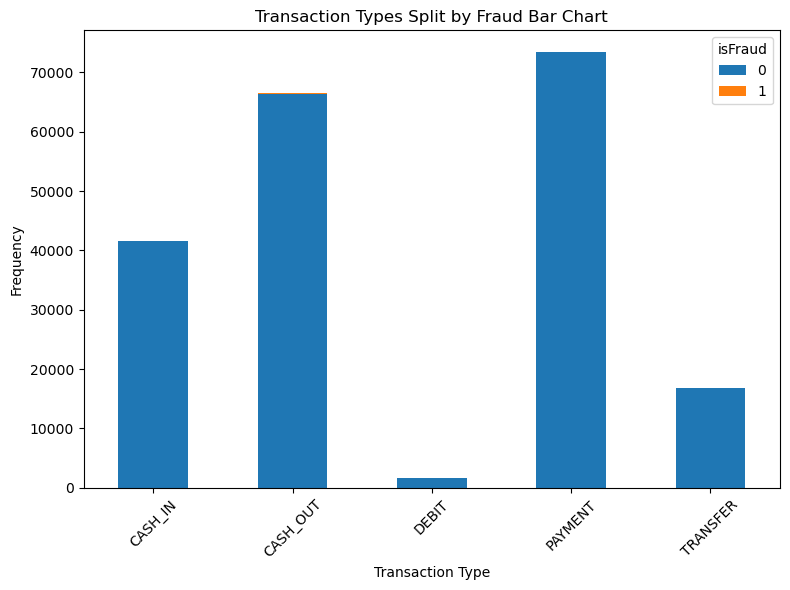

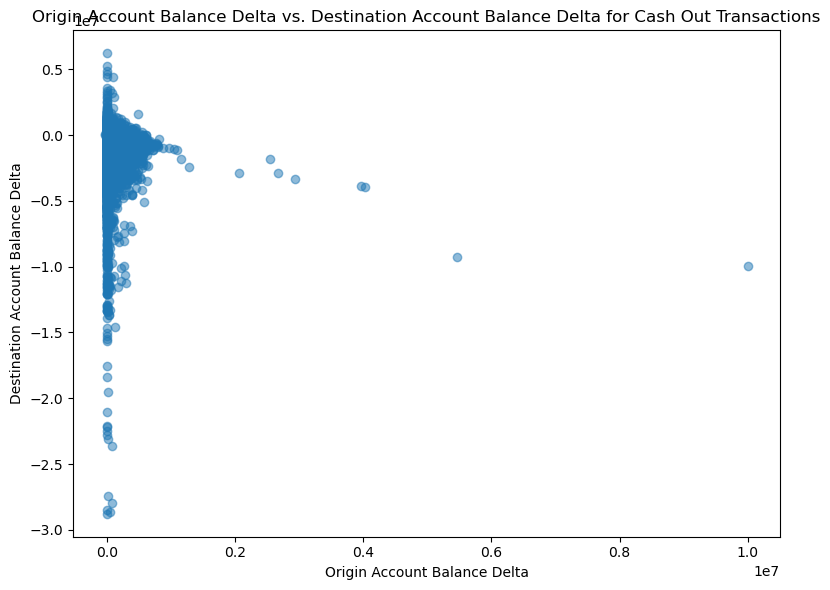

Transaction Types Bar Chart:
The bar chart shows the frequency of each transaction type in the dataset, providing an overview of the most common types of transactions.

Transaction Types Split by Fraud Bar Chart:
The stacked bar chart displays the frequency of each transaction type, differentiated by whether fraud was detected. It helps identify which transaction types are more prone to fraudulent activity.

Origin Account Balance Delta vs. Destination Account Balance Delta for Cash Out Transactions:
The scatter plot illustrates the relationship between the change in origin account balance and the change in destination account balance for Cash Out transactions. This can help identify any patterns or anomalies in account balance adjustments during these transactions.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the dataset (transactions.csv) as a Pandas dataframe
df = pd.read_csv("transactions.csv")

# Step 2: Create a bar chart for Transaction types
transaction_types_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(transaction_types_counts.index, transaction_types_counts.values)
plt.title('Transaction Types Bar Chart')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
transaction_types_desc = "The bar chart shows the frequency of each transaction type in the dataset, providing an overview of the most common types of transactions."

# Step 3: Create a bar chart for Transaction types split by fraud
transaction_fraud_counts = df.groupby(['type', 'isFraud']).size().unstack()
transaction_fraud_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Transaction Types Split by Fraud Bar Chart')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
transaction_fraud_desc = "The stacked bar chart displays the frequency of each transaction type, differentiated by whether fraud was detected. It helps identify which transaction types are more prone to fraudulent activity."

# Step 4: Create a scatter plot for Origin account balance delta v. Destination account balance delta (for Cash Out transactions)
cash_out_df = df[df['type'] == 'CASH_OUT']
plt.figure(figsize=(8, 6))
plt.scatter(cash_out_df['oldbalanceOrg'] - cash_out_df['newbalanceOrig'],
            cash_out_df['oldbalanceDest'] - cash_out_df['newbalanceDest'],
            alpha=0.5)
plt.title('Origin Account Balance Delta vs. Destination Account Balance Delta for Cash Out Transactions')
plt.xlabel('Origin Account Balance Delta')
plt.ylabel('Destination Account Balance Delta')
plt.tight_layout()
plt.show()
scatter_plot_desc = "The scatter plot illustrates the relationship between the change in origin account balance and the change in destination account balance for Cash Out transactions. This can help identify any patterns or anomalies in account balance adjustments during these transactions."

# Return the descriptions
descriptions = {
    'Transaction Types Bar Chart': transaction_types_desc,
    'Transaction Types Split by Fraud Bar Chart': transaction_fraud_desc,
    'Origin Account Balance Delta vs. Destination Account Balance Delta for Cash Out Transactions': scatter_plot_desc
}

descriptions_str = "\n\n".join([f"{key}:\n{descriptions[key]}" for key in descriptions])
print(descriptions_str)


In [ ]:
def visual_2(df):
    def query(df):
        # TODO
        pass
    plot = query(df).plot.scatter(x='TODO',y='TODO')
    plot.set_title('TODO')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'TODO'

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

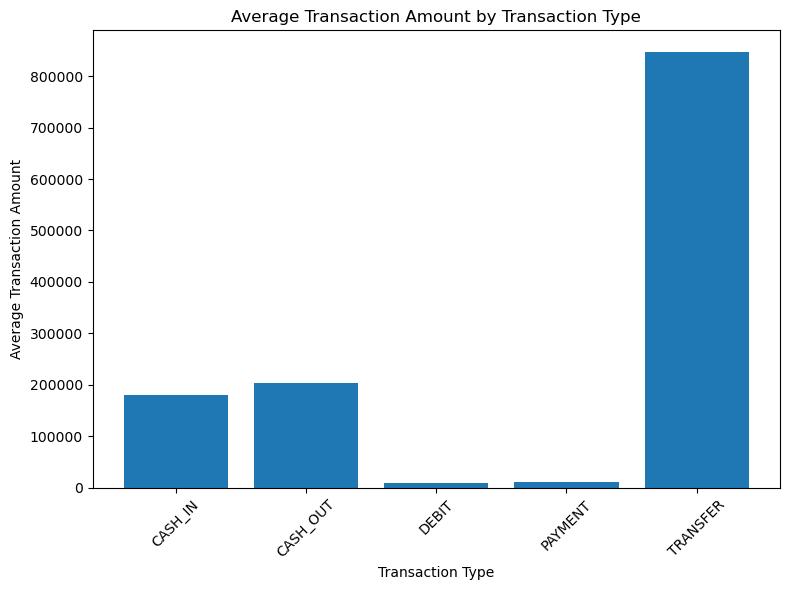

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the dataset (transactions.csv) as a Pandas dataframe
df = pd.read_csv("transactions.csv")

# Step 2: Calculate the average transaction amount for each transaction type
average_transaction_amount = df.groupby('type')['amount'].mean()

# Step 3: Create a custom visualization function
def visual_custom(data, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    plt.bar(data.index, data.values)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 4: Create a bar chart using the custom visualization function
visual_custom(data=average_transaction_amount,
              title='Average Transaction Amount by Transaction Type',
              x_label='Transaction Type',
              y_label='Average Transaction Amount')


Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.